### IDs:
Insert yours IDs to the cell below

ID #1:329827190

ID #2:204818181


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [2]:
import pandas as pd
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from scipy import stats 
import math

### Question 1 - Data viz - practical

Load Boston dataset from sklearn
1. Produce a histogram of the apartments’ price. 
2. Produce a box plot of the apartments’ price. 
3. Produce a correlation matrix of all the features.
4. Select the 2 pairs of features with the highest correlation (positive or negative) and plot 2 scatter plots with marginal histograms (JoinPlot)
5. Produce a cumulative histogram of the age variable and add two horizontal lines on the first and third quartile (on the cumulative count)
6. Identify and report 2 “interesting” trends in the data. No need to provide statistical confidence at this point. 

*__Answer 1__*

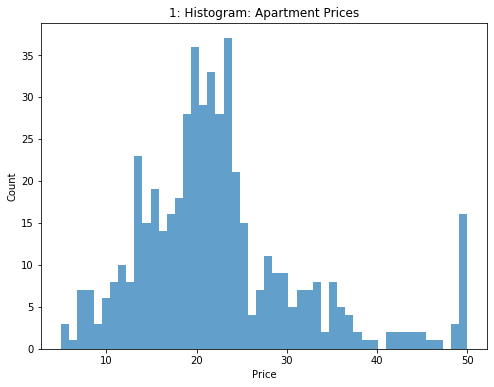

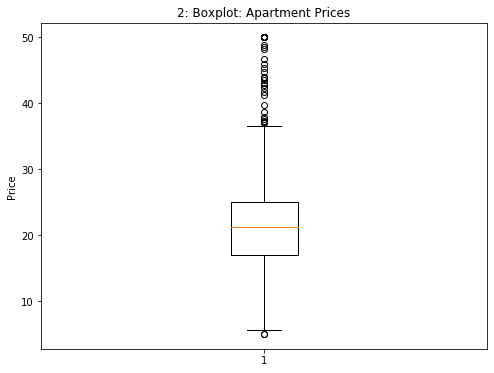

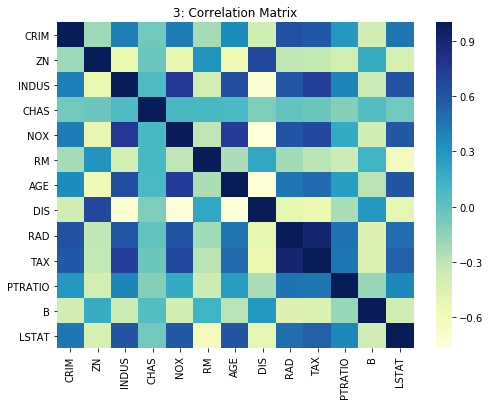

<Figure size 576x432 with 0 Axes>

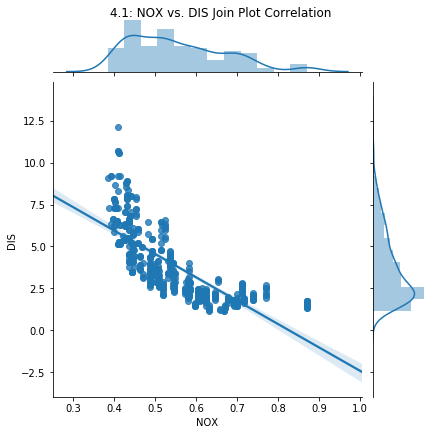

<Figure size 576x432 with 0 Axes>

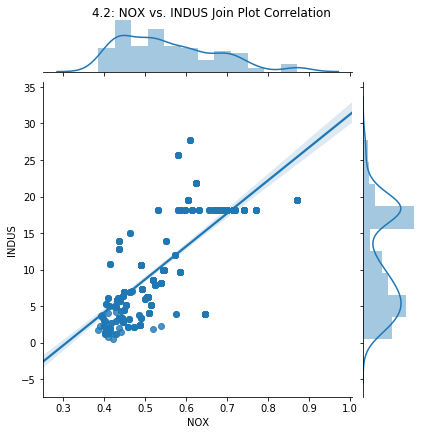

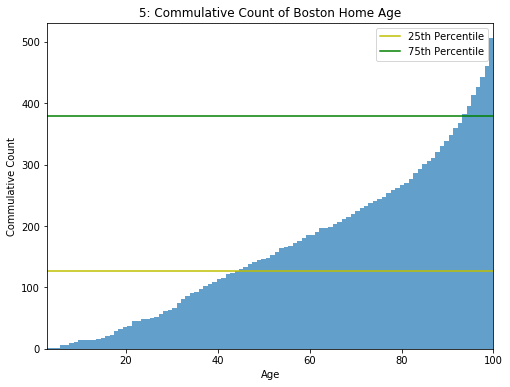

In [3]:
boston = load_boston()

#1
plt.figure(figsize=(8,6))
plt.hist(boston.target, bins=50, alpha = 0.7)
plt.title("1: Histogram: Apartment Prices")
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

#2
plt.figure(figsize=(8, 6))
X = pd.DataFrame(boston.target)
X.columns = ['TARGET']
# bp = plt.boxplot(x = boston.target, showfliers=False, patch_artist=True, labels =[""]);

plt.boxplot(X['TARGET'])
# for box in bp['boxes']:
#     box.set(color='cornflowerblue')
plt.title("2: Boxplot: Apartment Prices")
plt.ylabel('Price')
plt.show()

#3
plt.figure(figsize=(8, 6))
boston_df = pd.DataFrame(data = boston.data, columns = boston.feature_names)
sns.heatmap(boston_df.corr(), cmap="YlGnBu", annot=False)
plt.title("3: Correlation Matrix")
plt.show()


#4
plt.figure(figsize=(8, 6))
sns.jointplot("NOX", "DIS", boston_df, kind="reg",)
plt.suptitle("4.1: NOX vs. DIS Join Plot Correlation", y=1)
plt.xlabel("NOX")
plt.ylabel("DIS")
plt.show()

plt.figure(figsize=(8, 6))
sns.jointplot("NOX", "INDUS", boston_df, kind="reg")
plt.suptitle("4.2: NOX vs. INDUS Join Plot Correlation", y=1)
plt.xlabel("NOX")
plt.ylabel("INDUS")
plt.show()

#5
plt.figure(figsize=(8, 6))
plt.hist(boston_df["AGE"],cumulative=True, bins=100,alpha=0.7)
# Define 25th range
age25 = np.percentile(boston_df['AGE'],25) 
twentyfive= np.where(boston_df['AGE'] - age25 < 0)[0]
# Define 75th range
age75 = np.percentile(boston_df['AGE'],75)
seventyfive = np.where(boston_df['AGE'] - age75 < 0)[0]
plt.axhline(twentyfive.size, label = '25th Percentile', color='y')
plt.axhline(seventyfive.size, label = '75th Percentile', color='g')
plt.xlim([boston_df["AGE"].min(),boston_df["AGE"].max()])
plt.title('5: Commulative Count of Boston Home Age')
plt.xlabel("Age")
plt.ylabel("Commulative Count")
plt.legend()
plt.show()


### Question 2 - Gaussian mixtures

In this question N(μ, σ2) stands for a normal distribution with mean μ and variance σ2. <br>
Fred, Mel and Sid are repair technicians who work for Randobezeq – a phone company. <br>
* Fast Fred takes time which is distributed as N(40, 16) to repair a telephone line failure at a customer’s home.
* Medium Mel takes time which is N(45, 36) for the same task.
* Slow Sid takes time which is N(50, 64) for the same task.

#### 2.A

Fred is due to arrive to repair your phone at 11AM tomorrow. How confident can you be that you will be done by 11:45? 

*__Answer 2A__*

In [4]:
confidence = stats.norm.cdf(45, loc=40, scale =4)
print('There is a {0:.1f}% confidence that Fred will finish his repair by 11:45'.format(confidence*100))

There is a 89.4% confidence that Fred will finish his repair by 11:45


When a customer in North Randomistan orders a repair, there is a 40% chance Fred will do the work and 30% each that Mel or Sid will do the work. 

#### 2.B

What is the distribution of the duration of repair in North Randomistan?

*__Answer 2B__*

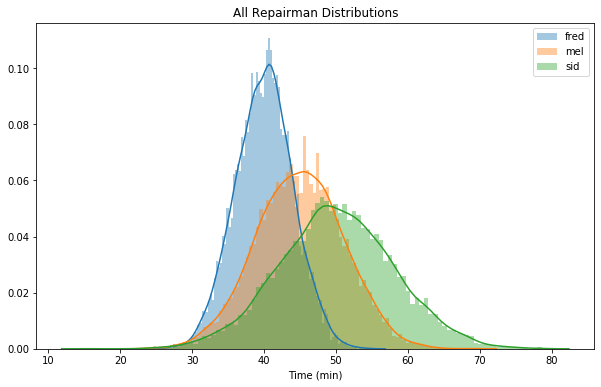

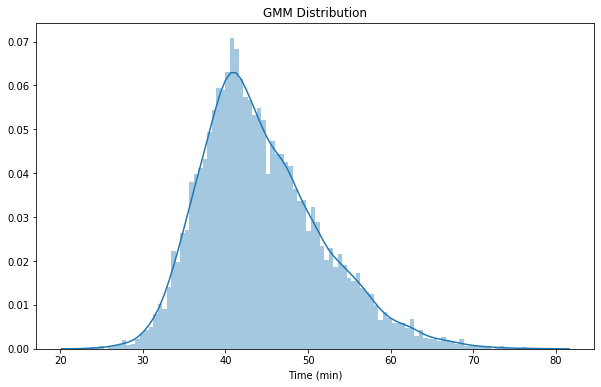

In [5]:
# Creating distributions and their weights
fred = stats.norm.rvs(loc = 40, scale = 4, size=10000)
mel = stats.norm.rvs(loc = 45, scale = 6, size=10000)
sid = stats.norm.rvs(loc = 50, scale = 8, size=10000)

mel_w = 0.30 
sid_w = 0.30  
fred_w = 0.40 

# Building the GMM
gmm_data = []
for i in range(10000):
    p = stats.uniform.rvs(size=1)
    if p < mel_w:
        gmm_data.append(np.random.choice(mel, size=1))
    elif p < sid_w + mel_w:
        gmm_data.append(np.random.choice(sid, size=1))
    else:
        gmm_data.append(np.random.choice(fred, size=1))
    
fig = plt.figure(figsize=(10, 6))
sns.distplot(fred,bins=100,label="fred")
sns.distplot(mel,bins=100, label="mel")
sns.distplot(sid,bins=100, label="sid")
plt.title("All Repairman Distributions")
plt.xlabel("Time (min)")
plt.legend()
    
fig = plt.figure(figsize=(10, 6))
sns.distplot(gmm_data, bins=100)
plt.title('GMM Distribution')
plt.xlabel("Time (min)")
plt.show()

#### 2.C
Let Φ denote the CDF of a standard normal random variable. Use Φ to express the CDF of the duration of a repair in North Randomistan.

*__Answer 2C__*

In order to  obrain the CDF of standard normal of the GMM of North Randomistan, we must first define the following standard normal distributions


$$F_{Z}=\frac{X-\mu_{Fred}}{\sigma_{Fred}} = \frac{X-40}{4} $$ 
$$M_{Z}=\frac{X-\mu_{Mel}}{\sigma_{Mel}} =  \frac{X-45}{6} $$
$$S_{Z}=\frac{X-\mu_{Sid}}{\sigma_{Sid}} = \frac{X-50}{8}  $$

As we want the CDF, we wish to obtain the probability where $P(X<x)$ considering the weights of each distribution

$$P(X < x) = 0.4 * P(F_{Z} < x) + 0.3 * P(M_{Z} < x) + 0.3 * P(S_{Z} < x)$$

$$ = 0.4 * P(F_{Z} < \frac{X-40}{4})+ 0.3 * P(M_{Z} < \frac{X-45}{6}) + 0.3 * P(S_{Z} < \frac{X-50}{8}) $$

$$= 0.4 * \phi(\frac{x-40}{4}) + 0.3 * \phi(\frac{x-45}{6}) + 0.3 * \phi(\frac{x-50}{8}) $$

#### 2.D

If the repair starts at 11AM, what is the earliest time for which the customer can assume, at a 95% certainty, that the repair will be already done?

*__Answer 2D__*

We assume with 95% certainty that a repair will be done by 11:59AM


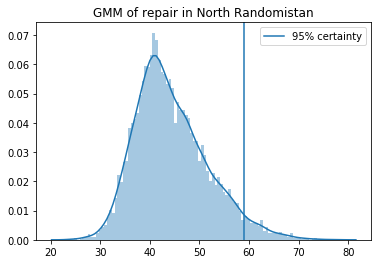

In [6]:
sns.distplot(gmm_data, bins=100)

max_val = np.amax(gmm_data)
min_val = np.amin(gmm_data)

mel_w = 0.30 
sid_w = 0.30  
fred_w = 0.40 

x = int(min_val)
while x < int(max_val):
    gmm_cdf = fred_w * stats.norm.cdf(x, loc = 40, scale = 4) + mel_w * stats.norm.cdf(x,loc = 45, scale = 6) + sid_w * stats.norm.cdf(x, loc = 50, scale = 8)
    if gmm_cdf >= 0.95:
        print("We assume with 95% certainty that a repair will be done by 11:{}AM".format(x))
        break
    x = x + 1
    
    
plt.axvline(x,label="95% certainty")
plt.title("GMM of repair in North Randomistan")
plt.legend()

### Question 3 - Gaussian mixtures – parameter estimation and generation

Consider the data provided in GMD.xlsx
Assume that the data comes from a Gaussian mixture distribution (GMD). Furthermore, assume that μ1=0 and that σ1=σ2=1.
Read the data and answer the following questions.

In [7]:
data = pd.read_excel('GMD.xlsx', header=None)
data

,0
0,0.5055
1,-1.5556
2,4.4784
3,4.5309
4,4.6819
...,...
995,4.7693
996,4.0197
997,3.5474
998,-0.4185


#### 3.A
Provide an estimate for the other parameters of the distribution in two different ways.

*__Answer 3A__*

In [8]:
# Relevant parameters: μ1, μ2, σ1, σ2, w1 and w2.
# We know that μ1 = 0 and σ1=σ2=1

# 1) Visuallization
# 2) EM

In [9]:
# https://people.duke.edu/~ccc14/sta-663/EMAlgorithm.html

(-2.5611, 7.0315)

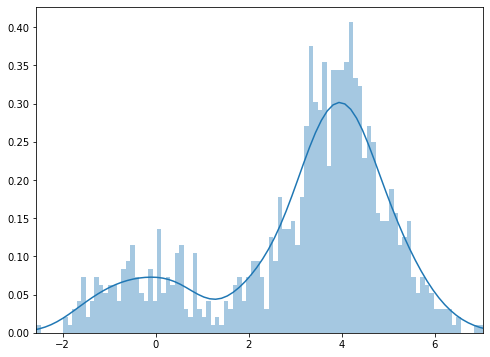

In [10]:
plt.figure(figsize=(8,6))
sns.distplot(data, bins=100)
# Setting the x axis range to start from the minimal value of the data to the maximum
plt.xlim(data[0].min(),data[0].max())

*__Answer 3A.1__*   
From the graph of the data above, we can visually estimate there are two Gaussian distributions.   
The first centered around 0, and the second centered around 4. i.e μ1 = 0 and μ2 = 4.    
We also observe that the data from the second distribution is observed about 4 times more than the the data from the first ditribution.  
Since we're assuming only two distributions, their probabilities must add up to 1 and we estimate that w1 = 0.2 and w2 = 0.8  


*__Answer 3A.2__*   
The second estimation method will be EM, learned in class

In [11]:
# we guessed the following initial parameters (on purpose not the same parameters that we visualized):
# w_1 = 0. 4
# w_2 = 0.6
# mu_2 = 7

init_w = [0.4, 0.6]
dist_1 = pd.DataFrame([[0, 1, init_w[0]]], columns=["miu", "sigma", "weights"])
dist_2 = pd.DataFrame([[7, 1, init_w[1]]], columns=["miu", "sigma", "weights"])

def find_params(data_count, resps):
    weight_1 = resps[0].sum() / data_count
    weight_2 = resps[1].sum() / data_count
    miu_2 = (gmd_df * resps[1]).sum() / (data_count * weight_2)
    return [miu_2, weight_1, weight_2]

def find_resp(data):
    prob_1 = stats.norm.pdf(data, loc=dist_1['miu'] * dist_1['weights'].values, scale=dist_1['sigma'])
    prob_2 = stats.norm.pdf(data, loc=dist_2['miu'] * dist_2['weights'].values, scale=dist_2['sigma'])
    cum_probs = prob_1 + prob_2
    return [prob_1 / cum_probs, prob_2 / cum_probs]

for i in range(1000):
    data_count = data.shape[0]
    resps = find_resp(data)
    params = find_params(data_count, resps)
    miu_2 = params[0]
    w_1 = params[1]
    w_2 = params[2]
    # continue until we reach desired threshold
    if np.isclose(w_1, dist_1['weights'], 0.001) and np.isclose(w_2, dist_2['weights'], 0.001) and np.isclose(miu_2, dist_2["miu"], 0.001):
        break
    dist_1['weights'] = w_1
    dist_2['weights'] = w_2
    dist_2["miu"] = miu_2

result_df = pd.concat([dist_1, dist_2], axis=0)
result_df.index = ['Distribution_1', 'Distribution_2']
result_df

NameError: name 'gmd_df' is not defined

#### 3.B
Plot a graph of the pdf of the distribution you inferred. Select adequate limits for the axes for this plot and explain your decision.

*__Answer 3B__*

In [ ]:
# We will choose the following limits:
# 1. for the x axis - between the minimum and maximum values in the given data (+-1)
# 2. for the y axis - This is a pdf and we don't have a density greater than 0.4 - we chose limits of [0,0.4]
x = np.linspace(gmd_df.min()-1, gmd_df.max()+1, num=100)
y = result_df.loc["Distribution_1", "weights"] * stats.norm.pdf(x, loc=result_df.loc["Distribution_1", "miu"], \
    scale=result_df.loc["Distribution_1", "sigma"]) + result_df.loc["Distribution_2", "weights"] * stats.norm.pdf(x, loc=result_df.loc["Distribution_2", "miu"], \
    scale=result_df.loc["Distribution_2", "sigma"])

x_limits = [gmd_df.min().values - 1, gmd_df.max().values + 1]
y_limits = [0.0, 0.35]

plt.figure(figsize=(8,6))
plt.plot(x,y)
plt.title("Gaussian Mixture PDF", fontsize=15)
plt.xlabel("values", fontsize=14)
plt.ylabel("densities", fontsize=14)
plt.xlim(x_limits[0], x_limits[1])
plt.ylim(y_limits[0], y_limits[1])

#### 3.C
Describe two ways for generating data for a GMD random variable with:
* centers at  μ1+3 and μ2+5 
* σ1=σ2=1
* w1=w2=0.5

*__Answer 3C - First way__*

First, compute the PDF of the gaussian mixture:  
$$f(x) = \sum_{i=1}^{2}(w_if_i(x))$$   
$$= 0.5 * \frac{1} {\sqrt{2\pi}} e^{\frac{-(x-\mu_1-3)^2} {2}} + 0.5 * \frac{1} {\sqrt{2\pi}} e^{\frac{-(x-\mu_2-5)^2} {2}}$$ 

Then, convert the PDF to CDF.  
Finally, sample n values between 0 and 1 from a uniform distribution and find their correspinding values in the inverse function, $CDF ^{-1}$

*__Answer 3C - Second way__*

Simply sample half-n values from $X \sim N(\mu_1 + 3, 1)$ and another half-n values from $Y \sim N(\mu_2 + 5, 1)$.


#### 3.D
Use one of the above approaches to generate 1000 points and plot a histogram of the result (decide on bins, axes etc)


*__Answer 3D__*

In [ ]:
w_1, w_2, miu_1, miu_2 = 0.5, 0.5, 0, 4

X = np.linspace(-20,20,10000)
dist_func = w_1 * (1 / ((2 * np.pi)**0.5)) * \
    np.exp(-0.5 * (X - miu_1 - 3)**2) + \
    w_2 * (1 / ((2 * np.pi)**0.5)) * \
    np.exp(-0.5 * (X - miu_2 - 5)**2)

cum_func = np.cumsum(dist_func) / 250
rand_func = np.random.random(10000)
indices = np.abs((rand_func.reshape(1,-1) - cum_func.reshape(-1,1))).argmin(axis=0)
plt.figure(figsize=(8,6))
plt.hist(X[indices], bins=40)
plt.title("GMD Random Variables Histogram 1", fontsize=15)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Occurrences", fontsize=14)


#### 3.E - BONUS
Use the other one to generate 1000 more points and draw two comparative histograms.


In [ ]:
n=1000

dist_1 = np.random.normal(loc=result_df.loc["Distribution_1", "miu"] + 3, scale=1, size=int(n/2))
dist_2 = np.random.normal(loc=result_df.loc["Distribution_2", "miu"] + 5, scale=1, size=int(n/2))
dist = np.append(dist_1, dist_2)

plt.figure(figsize=(8,6))
plt.hist(dist, bins=40)
plt.title("GMD RV Histogram 2", fontsize=15)
plt.xlabel("Values", fontsize=14)
plt.ylabel("Occurrences", fontsize=14)

### Question 4 - Normally distributed salaries

The annual salaries of employees in a large Randomistan company are approximateley normally distributed with a mean of 50,000 RCU and a standard deviation of 20,000 RCU.

#### 4.A
What percent of people earn less than 40,000 RCU?

*__Answer 4A__*

In [ ]:
res = stats.norm.cdf(40000,loc = 50000, scale=20000) *100
print("{:0.2f}% of people earn less than 40,000 RCU".format(res))

#### 4.B
What percent of people earn between 45,000 RCU and 65,000 RCU?

*__Answer 4B__*

In [ ]:
res1 = stats.norm.cdf(45000,loc = 50000, scale=20000)*100
res2 = stats.norm.cdf(65000,loc = 50000, scale=20000)*100
print("{:0.2f}% of people earn between 45,000 RCU and 65,000 RCU".format(res2 - res1))

#### 4.C
What percent of people earn more than 70,000 RCU?

*__Answer 4C__*

In [ ]:
res = (1 - stats.norm.cdf(70000,loc = 50000, scale=20000)) * 100
print("{:0.2f}% of people earn more than 70,000 RCU".format(res))

#### 4.D
The company has 1000 employees. Do you expect that there are any employees that earn more than 120,000 RCU?  

*__Answer 4D__*

In [ ]:
res = (1 - stats.norm.cdf(120000,loc = 50000, scale=20000))*1000
print("We expect that {} employees earn more than 120,000 RCU".format(math.floor(res)))


### Question 5 - Coupon collector

Let $T_{N}$ denote the waiting time for full single coupon collection with N different equiprobable coupon types

#### 5.A
Write code to compute the exact value of $E(T_{N})$

*__Answer 5A__*

In [ ]:
def expectation(n):
    p = (n - np.arange(n)) / n
    # Sum all Geometric expectations
    return (1/p).sum()

#### 5.B
Write code to compute the exact value of $V(T_{N})$

*__Answer 5B__*

In [ ]:
def variance(n):
    p = (n - np.arange(n)) / n
    # Sum over all variances
    return ((1-p)/(p**2)).sum()

#### 5.C
Write code to exactly compute $P(T_{20}>60)$

*__Answer 5C__*

In [ ]:
def prob(n,k):
    p = (n - np.arange(n)) / n
    res = stats.geom.pmf(np.arange(k)+1, p[0])
    for curr_p in p[1:]:
        # Obtain the proper distribution
        Y = stats.geom.pmf(np.arange(k) + 1, curr_p)
        # Using convolutions
        res = np.convolve(res, Y)
        
    return 1 - res[:k+1-n].sum()


print("There is {:.2f}% probability for 20 coupons take more than 60 trials to be collected".format(prob(20,60)))

#### 5.D
Use Chebicheff to provide a bound for the probability from C and compare the results

*__Answer 5D__*

In order to use Chebicheff we must first find $E(T_{20})$, lucky, we built a function to help us:

In [ ]:
expectation(20)

We will show that Chebicheff cannot be used to provide a bound for this set up.

Recall that Chebicheff's inequality is defined as:
$$\forall \lambda \geq 0, P(|T - E(T)| \geq \lambda) \leq \frac{Var(T)}{\lambda^2}$$

Hence, as Chebicheff doesnt doesnt have a tight bound, we know that $P(T > 60)$ will be less than what Chebicheff will give us

$$ P(T > 60) \leq P(|T - 71.9| \geq 60 -71.9) =  P(|T - 71.9| \geq -11.9) $$

However this shows us that $\lambda < 0$, a contradiction to the necessary set up of Chebysheff

### Question 6 - More on convolutions

Let n be an integer, not prime. <br>
Find two distributions a and b on the nonnegative integers, both not concentrated at 0 (this is the trivial answer…), such that the convolution of a and b is the equiprobable (uniform) distribution on the set of numbers 0, 1, 2, . . . , n-1. <br>
\* Note: If n is prime this is not possible, but the proof is not so easy. 

*__Answer 6__*

Let n be a non prime integer. We will define two distributions and show that their convolution is distributed uniformly on the interval [0, n-1].  

As n is a non prime number, there must exist two integers $p, q$ s.t. $n=pq$<br>
Let $X, Y$ be two distributions defined by the following:

\begin{equation}
\\X(d) =
\begin{cases}
      \frac{1}{p} & 0 \leq d < p \\
      0 & \text{otherwise}
   \end{cases}
\end{equation}

\begin{equation}
\\Y(d) =
\begin{cases}
      \frac{1}{q} & d = i*p\quad st \quad 0 \leq i < q\\
      0 & \text{otherwise}
   \end{cases}
\end{equation}
<br>
We define the convolution of $X,Y$ as :  
$P(k) = X(k)*Y(k)$<br>
So we have  
$$P(k) = (X(0)Y(k)) +$$  
$$(X(1)Y(k-1)) +  $$
$$... +  $$
$$(X(k-1)Y(1)) +  $$
$$(X(k)Y(0))$$

<br><br>
As we consider the terms of the distribution X(k), we see we have two cases for the convolution $P$:<br>

$k < p :$ 
$$P(k) = (X(0)Y(k)) + $$  
$$(X(1)Y(k-1)) +  $$
$$... +  $$
$$(X(k-1)Y(1)) +  $$
$$(X(k)Y(0))$$
$$= \frac{1}{p}(Y(k) + Y(k-1) + ... + Y(0)$$

<br><br>

$k \geq p : $
$$P(k) = (X(0)Y(k)) + $$
$$(X(1)Y(k-1)) + $$
$$... + $$
$$(X(k)Y(0))$$

<br>
since $X(k) = 0$ for $k \geq p$:<br>

$$= (X(0)Y(k)) + $$
$$(X(1)Y(k-1)) + $$
$$...  + $$
$$(X(p - 1)Y(k - (p - 1)))$$
$$=\frac{1}{p}(Y(k) + Y(k-1)) + ...  + (Y(k - (p - 1))) $$

<br><br>
Similarly, we have two cases for the second distribution:<br>
$k < p :$
<br>
The definition of Y gives us that for all $k \in (0,p)$ there does not exist an integer $i \in (0,q)$ s.t. $i*p = k$.<br>
Therefore, $ B(k) = 0$ for all $k \in (0,p)$. Note that for $k = 0$, $i*p = k (i.e., i = 0)$ and so in this case, $Y(0) = \frac{1}{q}$

Therefore, we have <br>

$$P(k) = \frac{1}{p}*$$
$$(Y(k) + $$
$$Y(k-1) + $$
$$Y(k-2) + $$
$$... + $$
$$Y(0) =$$
$$ \frac{1}{p}(0 + 0 + 0 + ... + \frac{1}{q}) =$$
$$\frac{1}{p} \cdot \frac{1}{q}
= \frac{1}{n}$$

<br><br>
$
k \geq p : \\
$
<br>
Consider the series $k - 0, k - 1, ... , k - (p - 1)$<br>
Note that there are $p$ sequential decreasing values. Therefore, it must be that exactly one of these values, $v$, satisfies $v \% p == 0$. Let $v = k - i'$. Note as well that we have $p$ number of values, so $k - v < p$.
<br>
Again, two cases:
<br>
$k < n:$  
Then $v < n $ and exists $0\leq i$ such that <br>
$v = i*p < n = pq$ <br>
Therefore, there must exist $i \in (0,q)$ <br>
and by the definition of $Y$ we have that $ Y(v) = \frac{1}{q}$, $Y(K \neq v) = 0$  
<br>
Therefore, when $k < n$: 

$$P(k) = \frac{1}{p}(Y(k) + $$
$$Y(k-1) + $$
$$Y(k-2) + $$
$$... + $$
$$Y(k - (p - 1)) = $$
$$\frac{1}{p} * \frac{1}{q}$$

<br>
<br>
When $k \geq n$:  
<br>
Assume for contradiction that  exists $i \in [0,q)$, 
<br> such that $v = i*p < pq$.<br>
Then, $ v \leq n - p \leq k - p $
<br> $k - v \geq p $, 
<br> So, we've reached a contradiction to $k - v < p$.
<br> Therefore there does not exist such an $i$ 
<br> So all $i$'s values for this case will be 0 (by the difinition of Y) 
<br> So finally, when $k \geq n$: <br>
$$P(k) = \frac{1}{p}(Y(k) + $$
$$Y(k-1) + $$
$$Y(k-2) + $$
$$... + $$
$$Y(k - (p - 1)) = $$
$$\frac{1}{p} ... 0 = 0$$

<br>
In conclusion, <br><br>
\begin{equation}
\\P(k) =
\begin{cases}
      \frac{1}{n} & 0 \leq k < n \\
      0 & \text{else}
   \end{cases}
\end{equation}
